In [89]:
from src.preprocessing.preprocess_ucr import UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.models.vqvae_classification import BaseVQVAE
from sklearn import metrics

import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib notebook

Define which dataset to analyse here:

In [90]:
dataset_analysis = 'CBF'

Loading vqvae and data

In [94]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

config['dataset']['dataset_name'] = dataset_analysis

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader, test_data_loader = [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

input_length = train_data_loader.dataset.X.shape[-1]

vqvae = BaseVQVAE(input_length, config)

self.X_train.shape: (30, 128)
self.X_test.shape: (900, 128)
# unique labels (train): [0 1 2]
# unique labels (test): [0 1 2]


grabbing zqs

In [95]:
zqs_train = vqvae.run_through_codebook(train_data_loader)
y_train = train_data_loader.dataset.Y.flatten().astype(int)

zqs_test = vqvae.run_through_codebook(test_data_loader)
y_test = test_data_loader.dataset.Y.flatten().astype(int)


## T-SNE

In [96]:
from sklearn.manifold import TSNE

zqs_test_embedded2 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(zqs_test)
zqs_train_embedded2 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(zqs_train)
zqs_test_embedded3 = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(zqs_test)
zqs_train_embedded3 = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(zqs_test)

In [79]:
print("zqs_train_embedding shape:", zqs_train_embedded2.shape)
print("zqs_train shape:", zqs_train.shape)
print("zqs_test_embedding shape:", zqs_test_embedded2.shape)
print("zqs_test shape:", zqs_test.shape)

zqs_train_embedding shape: (30, 2)
zqs_train shape: (30, 2560)
zqs_test_embedding shape: (900, 2)
zqs_test shape: (900, 2560)


Text(0.5, 1.0, 'CBF - test set - tsne 2 comps')

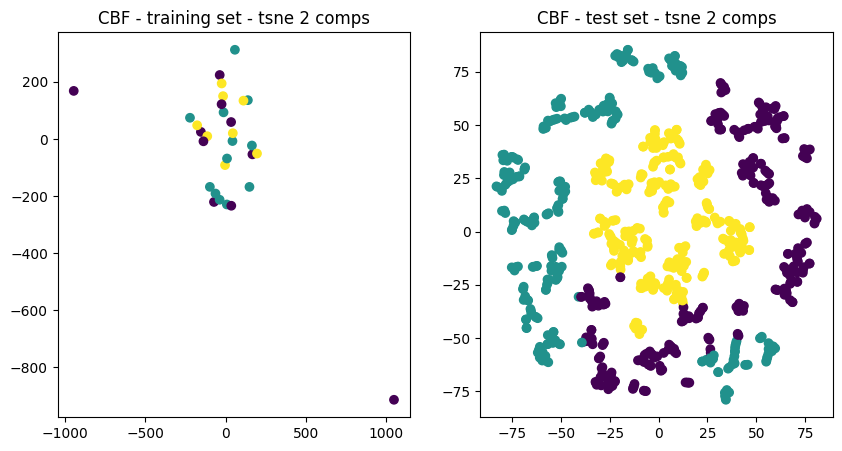

In [54]:
f, ax = plt.subplots(1, 2)
f.set_figheight(5); f.set_figwidth(10)
ax[0].scatter(zqs_train_embedded2[:, 0], zqs_train_embedded2[:, 1], c=y_train)
ax[1].scatter(zqs_test_embedded2[:, 0], zqs_test_embedded2[:, 1], c=y_test)
ax[0].set_title(f"{config['dataset']['dataset_name']} - training set - tsne 2 comps")
ax[1].set_title(f"{config['dataset']['dataset_name']} - test set - tsne 2 comps")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## PCA

In [97]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_5 = PCA(n_components=10)


pc_test = pca_2.fit_transform(zqs_test)
pc_test_ratios = pca_5.fit(zqs_test).explained_variance_ratio_
pc_train = pca_2.fit_transform(zqs_train)
pc_train_ratios = pca_5.fit(zqs_train).explained_variance_ratio_

print("Variance explained ratios on test:", pc_test_ratios)
print("Variance explained ratios on train:", pc_train_ratios)

Variance explained ratios on test: [0.44324777 0.16474304 0.08668568 0.05470914 0.03636766 0.02554477
 0.02112913 0.01666005 0.01068684 0.00926178]
Variance explained ratios on train: [0.4515651  0.17291357 0.07902869 0.05576624 0.04701678 0.02549477
 0.02394305 0.01841021 0.01728361 0.01442469]


In [98]:
f, ax = plt.subplots(1, 2)
f.set_figheight(5); f.set_figwidth(10)
ax[0].scatter(pc_train[:, 0], pc_train[:, 1], c=y_labs_train)
ax[1].scatter(pc_test[:, 0], pc_test[:, 1], c=y_labs_test)
ax[0].set_title(f"{config['dataset']['dataset_name']} - training set - PCA 2 comps")
ax[1].set_title(f"{config['dataset']['dataset_name']} - test set - PCA 2 comps")
plt.show()

<IPython.core.display.Javascript object>

In [57]:
codebook = vqvae.get_codebook()

In [99]:
pca_codebook_3 = PCA(n_components=3)
pca_codebook_3.fit(codebook)

pca_codebook_2 = PCA(n_components=2)
pca_codebook_2.fit(codebook)

PCA(n_components=2)

3 comps:

In [100]:
print(pca_codebook_3.explained_variance_ratio_)
print(sum(pca_codebook_3.explained_variance_ratio_))

[0.64350806 0.17207138 0.08943131]
0.9050107422475022


2 comps:

In [101]:
print(pca_codebook_2.explained_variance_ratio_)
print(sum(pca_codebook_2.explained_variance_ratio_))

[0.64350806 0.17207138]
0.8155794357960795


In [102]:
print(pca_codebook_2.explained_variance_ratio_)
print(sum(pca_codebook_3.explained_variance_ratio_))

[0.64350806 0.17207138]
0.9050107422475022


In [103]:
codebook_pca3_transformed = pca_codebook_3.fit_transform(codebook)
codebook_pca2_transformed = pca_codebook_2.fit_transform(codebook)

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(codebook_pca3_transformed[:, 0], codebook_pca3_transformed[:, 1], codebook_pca3_transformed[:, 2])
plt.show()

<IPython.core.display.Javascript object>

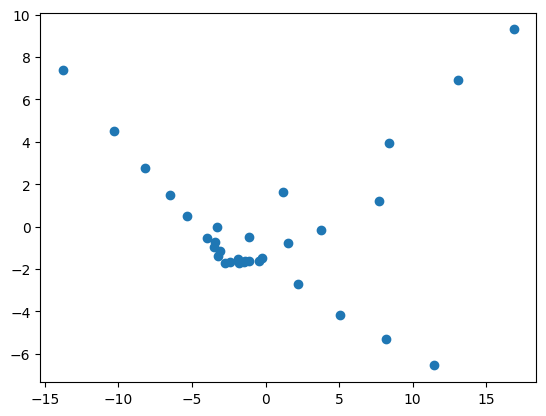

In [86]:
f, ax = plt.subplots()
ax.scatter(codebook_pca2_transformed[:, 0], codebook_pca2_transformed[:, 1])
plt.show()